# **MOVIE DATASET**

The dataset `Movie_data.csv` contains information about various movies. Here's an overview of the columns in the dataset:

- **Rank:** The ranking of the movie.
- **Title:** The title of the movie.
- **Genre:** The genre(s) of the movie.
- **Description:** A brief description of the movie.
- **Director:** The director of the movie.
- **Actors:** The main actors in the movie.
- **Year:** The year in which the movie was released.
- **Runtime (Minutes):** The runtime of the movie in minutes.
- **Rating:** The rating of the movie.
- **Votes:** The number of votes the movie has received.
- **Revenue (Millions):** The revenue of the movie in millions.
- **Metascore:** The Metascore of the movie.

We will need the following libraries:
 - **Numpy** — for scientific computing (e.g., linear algebra (vectors & matrices)).
 - **Pandas** — providing high-performance, easy-to-use data reading, manipulation, and analysis.
 - **Matplotlib** — plotting & visualization.
 - **Seaborn** — plotting & visualization.

# **Data Loading**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data now is stored on disk in a csv (Comma Separated Values) file. To load the data to our code, we use `pandas` module, more specifically, the `read_csv` function.

In [ ]:
data_path = "Movie_data.csv"
movie = pd.read_csv(data_path)
movie.head(5)

# **Data Understanding**

Check how many rows and columns in our dataset

In [ ]:
movie.shape

(1000, 12)

Using the function `info()`, we can check:
- data types (int, float or object)
- missing values
- memory usage
- number of rows and columns

In [ ]:
#Get concise information of each column in dataset
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


Using the function `describe()`, we can check the mean, standard deviation, maximum, and minimum of each numerical feature (column) with 25, 50 and 75% percentiles

In [ ]:
#Get a statistical summary for all numerical columns
movie.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


Get to know all the features name

In [ ]:
movie.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

Check for missing values in all columns

In [ ]:
movie.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [ ]:
movie.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

# **EDA**

### Handling missing values

##### **Revenue Missing Values**

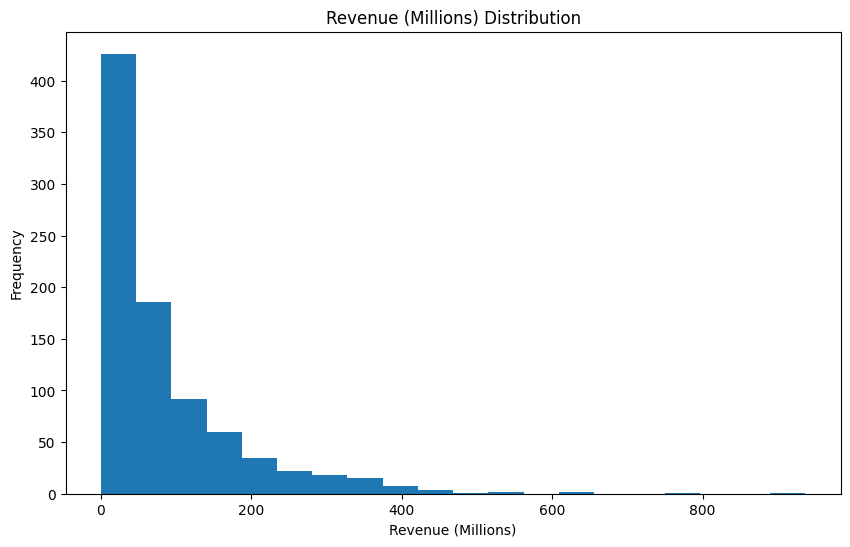

In [ ]:
#try to decide with what to replace the missing values
#Visualize the distribution of the revenue column

#set frequency in percentage
plt.figure(figsize=(10,6))
plt.hist(movie['Revenue (Millions)'], bins=20)

plt.xlabel('Revenue (Millions)')
plt.ylabel('Frequency')
plt.title('Revenue (Millions) Distribution')
plt.show()

As we can see that `Revenue (Millions)` is **right-skewed**, also known as positively skewed.

This means that the majority of the data points are clustered towards the **left side** of the histogram (lower values), with a **long tail** extending to the *right* (higher values).

In [ ]:
revenue_median = movie['Revenue (Millions)'].median()
revenue_mean = movie['Revenue (Millions)'].mean()
print(revenue_mean)
print(revenue_median)
movie['Revenue (Millions)'].fillna(revenue_median, inplace=True)

82.95637614678898
47.985


##### **Metascore Missing Values**

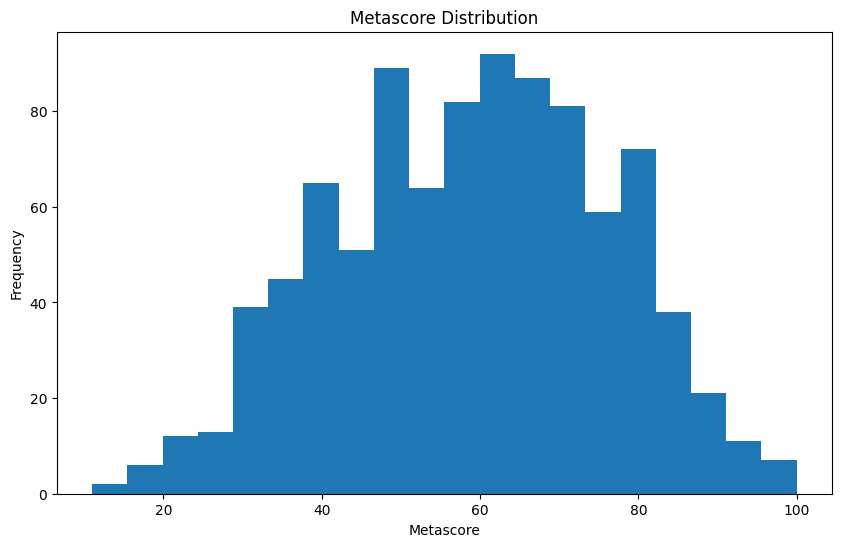

In [ ]:
#visualize the distribution of the Metascore column
plt.figure(figsize=(10,6))
plt.hist(movie['Metascore'], bins=20)

plt.xlabel('Metascore')
plt.ylabel('Frequency')
plt.title('Metascore Distribution')
plt.show()

We can see that the data appears to be somewhat **symmetric with a slight left skew**

It means there are fewer movies with lower Metascore values and more movies that have average or above-average scores.

In [ ]:
movie['Metascore'].mean()

58.98504273504273

In [ ]:
movie['Metascore'].median()

59.5

In [ ]:
movie['Metascore'].fillna(movie['Metascore'].mean(), inplace=True)

In [ ]:
#no more missing values
movie.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

### Sorting Dataframe on Revenue values


In [ ]:
movie.rename(columns={'Revenue (Millions)': 'Revenue'}, inplace=True)

In [ ]:
movie.sort_values(by=['Revenue'], ascending=False, ignore_index=True, inplace=True)

top_10 = movie.loc[:9, ['Title', 'Revenue']]
top_10

,Title,Revenue
0,Star Wars: Episode VII - The Force Awakens,936.63
1,Avatar,760.51
2,Jurassic World,652.18
3,The Avengers,623.28
4,The Dark Knight,533.32
5,Rogue One,532.17
6,Finding Dory,486.29
7,Avengers: Age of Ultron,458.99
8,The Dark Knight Rises,448.13
9,The Hunger Games: Catching Fire,424.65


In [ ]:
movie[movie['Title'] == 'Star Wars: Episode VII - The Force Awakens']

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue,Metascore
0,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0


*Star Wars: Episode VII - The Force Awakens* is the highest earning movie of all time

### Data Visualization

##### **Highest Revenue Movies**

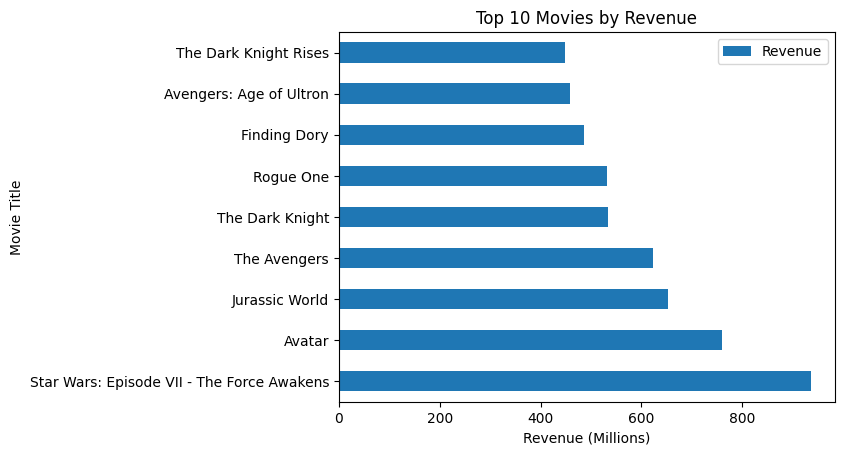

In [ ]:
movie[:9].plot(kind='barh', x='Title', y='Revenue')

plt.xlabel('Revenue (Millions)')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies by Revenue')
plt.show()

<Axes: ylabel='Title'>

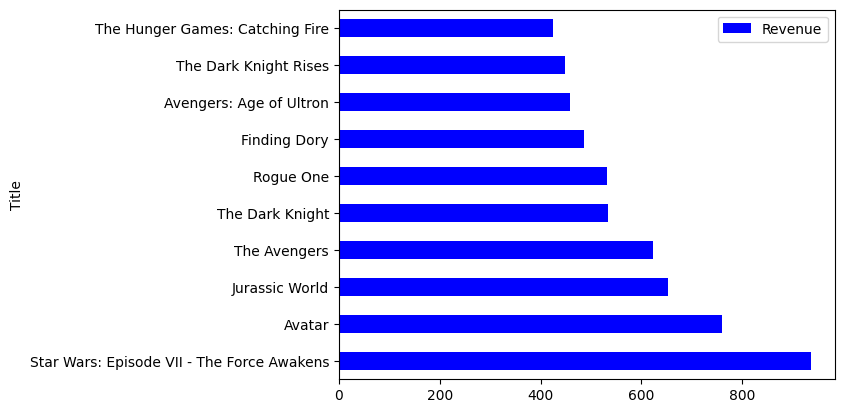

In [ ]:
top_10.plot(kind='barh', x='Title', y='Revenue', color='blue')

##### **Highest Rated Movies**

In [ ]:
movie.sort_values(by= ['Rating'], ascending=False, ignore_index=True, inplace=True)

top_10_rating = movie.loc[:9, ['Title', 'Rating']]
top_10_rating

,Title,Rating
0,The Dark Knight,9.0
1,Dangal,8.8
2,Inception,8.8
3,Interstellar,8.6
4,Kimi no na wa,8.6
5,The Intouchables,8.6
6,The Prestige,8.5
7,Taare Zameen Par,8.5
8,The Departed,8.5
9,The Dark Knight Rises,8.5


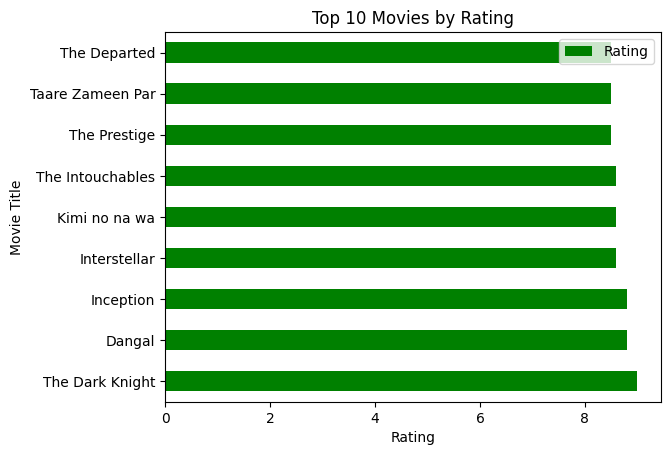

In [ ]:
movie[:9].plot(kind= 'barh', x='Title', y='Rating', color='green')

plt.xlabel('Rating')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies by Rating')
plt.show()

##### **Highest Rated Movie by Votes**

In [ ]:
movie.sort_values(by= ['Votes'], ascending=False, ignore_index=True, inplace=True)

top_10_votes = movie.loc[:9, ['Title', 'Votes']]
top_10_votes

,Title,Votes
0,The Dark Knight,1791916
1,Inception,1583625
2,The Dark Knight Rises,1222645
3,Interstellar,1047747
4,The Avengers,1045588
5,Django Unchained,1039115
6,Inglourious Basterds,959065
7,The Departed,937414
8,Avatar,935408
9,The Prestige,913152


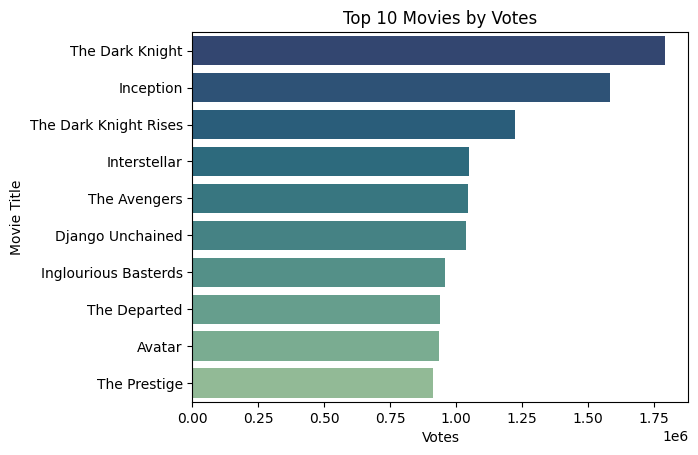

In [ ]:
sns.barplot(y='Title', x='Votes', data= movie.loc[0:9], palette= 'crest_r')

plt.xlabel('Votes')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies by Votes')
plt.show()

Text(0.5, 0.98, 'Top 10 Movies by Votes')

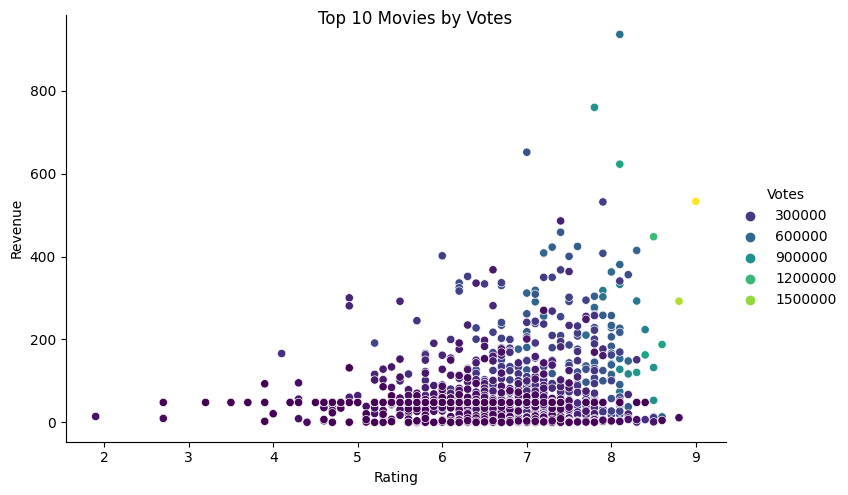

In [ ]:
sns.relplot(x='Rating', y='Revenue', data=movie, hue='Votes', palette='viridis', height=5, aspect=1.5)
plt.suptitle('Top 10 Movies by Votes')

#### **Directors**

In [ ]:
movie.Director.unique()

array(['Christopher Nolan', 'Joss Whedon', 'Quentin Tarantino',
       'Martin Scorsese', 'James Cameron', 'Andrew Stanton', 'James Gunn',
       'Jon Favreau', 'Gary Ross', 'Pete Docter', 'Danny Boyle',
       'Peter Jackson', 'J.J. Abrams', 'Ethan Coen', 'Zack Snyder',
       'David Fincher', 'George Miller', 'Tim Miller', 'Alfonso Cuarón',
       'Todd Phillips', 'Clint Eastwood', 'Shane Black', 'David Yates',
       'Lee Unkrich', 'Darren Aronofsky', 'Kenneth Branagh',
       'Francis Lawrence', 'David O. Russell', 'Olivier Nakache',
       'Neill Blomkamp', 'Ridley Scott', 'Bryan Singer', 'Gore Verbinski',
       'Matthew Vaughn', 'Sam Mendes', 'Joe Johnston', 'Anthony Russo',
       'Tom Hooper', 'Morten Tyldum', 'Michael Bay', 'Wes Anderson',
       'Paul Greengrass', 'Dean DeBlois', 'Brad Bird', 'Pierre Morel',
       'Guy Ritchie', 'Alejandro González Iñárritu', 'Guillermo del Toro',
       'Martin Campbell', 'Marc Forster', 'Seth MacFarlane',
       'Louis Leterrier', 'Steve 

In [ ]:
directors= movie['Director']
directors

0      Christopher Nolan
1      Christopher Nolan
2      Christopher Nolan
3      Christopher Nolan
4            Joss Whedon
             ...        
995        Mark Williams
996         Alexi Pappas
997    Gillies MacKinnon
998        David Leveaux
999        Amber Tamblyn
Name: Director, Length: 1000, dtype: object

In [ ]:
directors.value_counts(ascending=False)
top_10_directors = directors.value_counts(ascending=False).iloc[:10]
top_10_directors

Ridley Scott          8
M. Night Shyamalan    6
Paul W.S. Anderson    6
Michael Bay           6
David Yates           6
Christopher Nolan     5
J.J. Abrams           5
Woody Allen           5
Justin Lin            5
Antoine Fuqua         5
Name: Director, dtype: int64

In [ ]:
list_10_directors_name = top_10_directors.index
list_10_directors_name

Index(['Ridley Scott', 'M. Night Shyamalan', 'Paul W.S. Anderson',
       'Michael Bay', 'David Yates', 'Christopher Nolan', 'J.J. Abrams',
       'Woody Allen', 'Justin Lin', 'Antoine Fuqua'],
      dtype='object')

In [ ]:
list_10_directors_count = top_10_directors.values
list_10_directors_count

array([8, 6, 6, 6, 6, 5, 5, 5, 5, 5])

In [ ]:
df_top10 = pd.DataFrame({'Director': list_10_directors_name, 'Count': list_10_directors_count})

<Axes: xlabel='Count', ylabel='Director'>

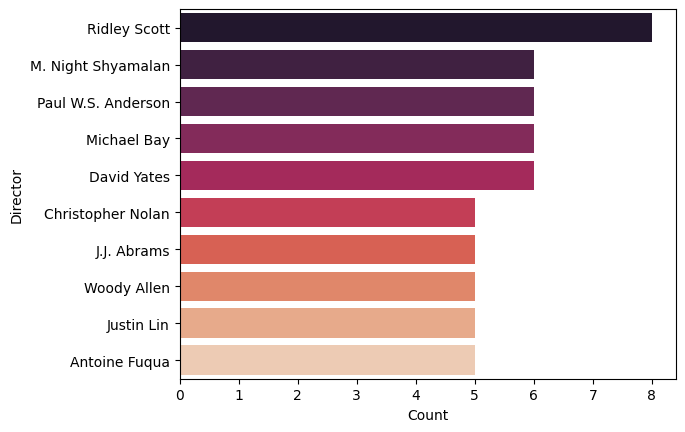

In [ ]:
sns.barplot(x= 'Count', y='Director', data=df_top10, palette='rocket')

In [ ]:
df_top10[df_top10['Director'] == 'Ridley Scott']

,Director,Count
0,Ridley Scott,8


In [ ]:
df_top10[df_top10['Count'].isin([6])]

,Director,Count
1,M. Night Shyamalan,6
2,Paul W.S. Anderson,6
3,Michael Bay,6
4,David Yates,6


### Subsetting

Let's visualize movie runtime distribution

<Axes: xlabel='Runtime (Minutes)', ylabel='Count'>

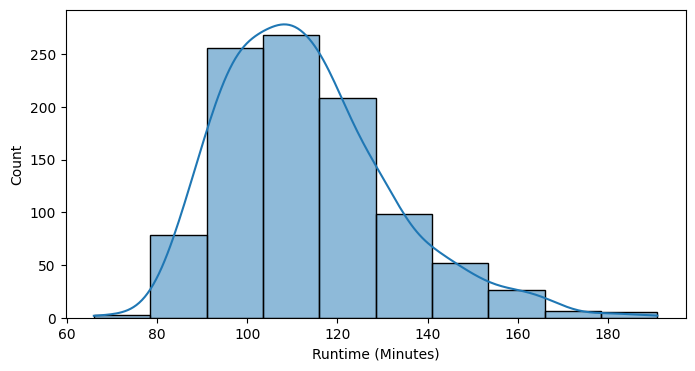

In [ ]:
import seaborn as sns

plt.figure(figsize=[8,4])

sns.histplot(movie['Runtime (Minutes)'], bins=10, kde= True)

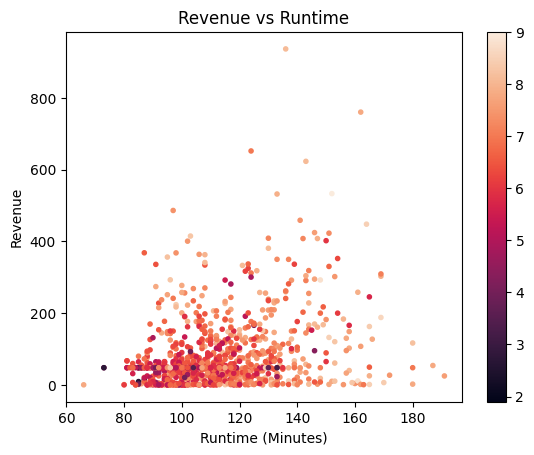

In [ ]:
plt.scatter(movie['Runtime (Minutes)'], movie['Revenue'], c= movie['Rating'], cmap='rocket', marker='.')

plt.colorbar()
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Revenue')
plt.title('Revenue vs Runtime')
plt.show()

Create new dataframe with only movies with less than 90mins Runtime

In [ ]:
short_movies = movie[movie['Runtime (Minutes)'] < 90].reset_index()
short_movies.shape

(72, 13)

In [ ]:
short_movies.head(5)

,index,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue,Metascore
0,98,364,Zombieland,"Adventure,Comedy,Horror",A shy student trying to reach his family in Oh...,Ruben Fleischer,"Jesse Eisenberg, Emma Stone, Woody Harrelson,A...",2009,88,7.7,409403,75.59,73.0
1,132,534,Lucy,"Action,Sci-Fi,Thriller","A woman, accidentally caught in a dark deal, t...",Luc Besson,"Scarlett Johansson, Morgan Freeman, Min-sik Ch...",2014,89,6.4,352698,126.55,61.0
2,171,493,Cloverfield,"Action,Horror,Sci-Fi",A group of friends venture deep into the stree...,Matt Reeves,"Mike Vogel, Jessica Lucas, Lizzy Caplan, T.J. ...",2008,85,7.0,313803,80.03,64.0
3,234,688,Jumper,"Action,Adventure,Sci-Fi",A teenager with teleportation abilities sudden...,Doug Liman,"Hayden Christensen, Samuel L. Jackson, Jamie B...",2008,88,6.1,252503,80.17,35.0
4,266,835,The Dictator,Comedy,The heroic story of a dictator who risked his ...,Larry Charles,"Sacha Baron Cohen, Anna Faris, John C. Reilly,...",2012,83,6.4,225394,59.62,58.0


In [ ]:
short_movies['Runtime (Minutes)'].max()

89

### Genres

In [ ]:
genres = set()
for genre in movie['Genre']:
    for item in genre.split(','):
        genres.add(item.strip())

genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [ ]:
genres_count = dict()
for genre in genres:
    genres_count[genre] = 0

for genre in movie['Genre']:
    for item in genre.split(','):
        genres_count[item.strip()] += 1

genres_count


{'Musical': 5,
 'History': 29,
 'Sci-Fi': 120,
 'Sport': 18,
 'Biography': 81,
 'Drama': 513,
 'Thriller': 195,
 'Comedy': 279,
 'Romance': 141,
 'Fantasy': 101,
 'Animation': 49,
 'Family': 51,
 'Crime': 150,
 'Western': 7,
 'Horror': 119,
 'Action': 303,
 'Music': 16,
 'Mystery': 106,
 'War': 13,
 'Adventure': 259}

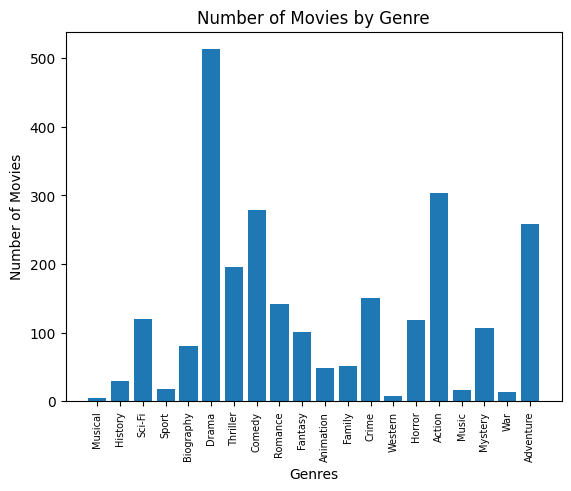

In [ ]:
# Create a bar chart
plt.bar(genres_count.keys(), genres_count.values())

# Add labels and title to the chart
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre')
plt.xticks(rotation=90, fontsize=7)

# Show the chart
plt.show()

In [ ]:
movie = movie.join(movie['Genre'].str.get_dummies(','))
movie.head(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,...,0,0,0,0,0,0,0,0,0,0
1,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,...,0,0,0,0,0,1,0,0,0,0
2,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,...,0,0,0,0,0,0,0,1,0,0
3,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,...,0,0,0,0,0,1,0,0,0,0
4,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,...,0,0,0,0,0,1,0,0,0,0


create 20 new dataframes and get to know the correlation between genre and revenue

or only try to visualize each genre distribution % revenue

maybe we can predict revenue depending on genre

# **Seaborn Dataset** -- Trial only!!

In [ ]:
sns.set()

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
planet = sns.load_dataset('planets')

In [ ]:
planet.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
planet.shape

(1035, 6)

In [ ]:
planet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [ ]:
planet.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [ ]:
planet.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64